Source Image (RGB)


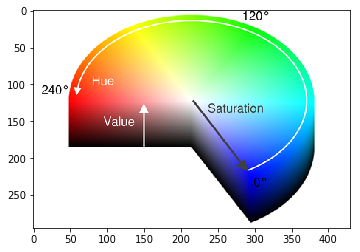

Source Image (HSV)


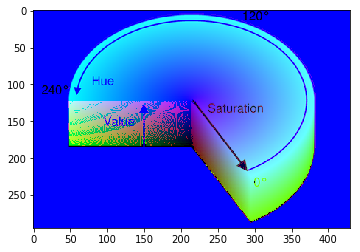

In [13]:
# %pylab inline
# есть картинка rgb, диапазоны для величины в HSV (если попали в один из диапазонов, то оставляем цвет, иначе 0)
# rgb -> hsv
# hsv - угол (тон), радиус (насыщенность), значение (светлота)
# выводить промежуточные результаты
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen

# Кажется, легче брать исходное изображение по ссылке
# link = 'http://answers.opencv.org/upfiles/logo_2.png'
# link = 'http://assets.runemadsen.com/circle_rgb-6c00abe1aef3327613842268b97acb01_large.jpg'
# link = 'https://www.engineering.com/Portals/0/BlogFiles/3D%20Printing/1012/color_wheel.jpg'
link = 'http://robocraft.ru/files/opencv/hsv-space.png'

req = urlopen(link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
source_img_rgb = cv2.imdecode(arr, -1)
print("Source Image (RGB)")
plt.imshow(source_img_rgb) # Source Image (RGB)
plt.show()

# Переход в пространство HSV
source_image_hsv = cv2.cvtColor(source_img_rgb, cv2.COLOR_RGB2HSV)
print("Source Image (HSV)")
plt.imshow(source_image_hsv) # Source Image (HSV)
plt.show()


----------------------Range------------------- 0


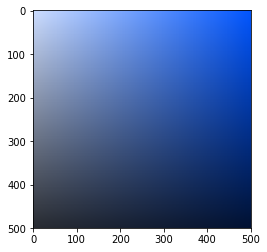

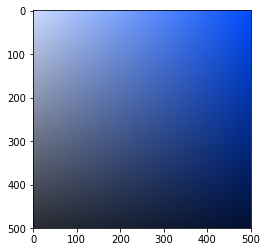

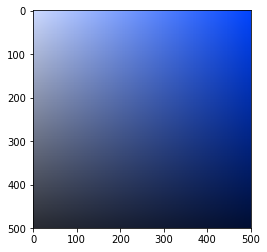

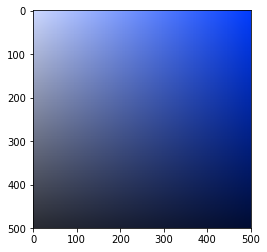

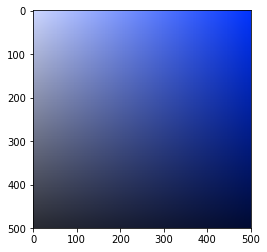

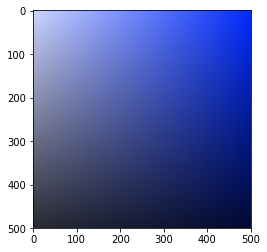

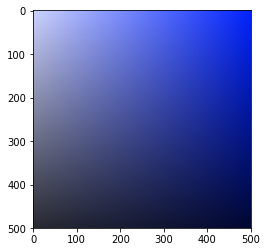

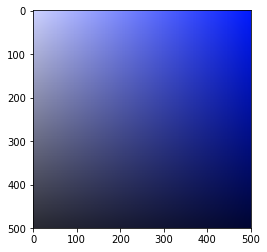

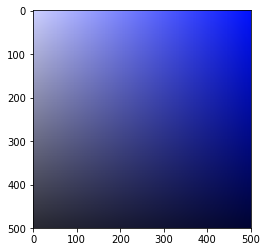

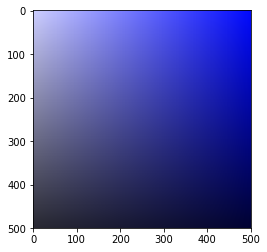

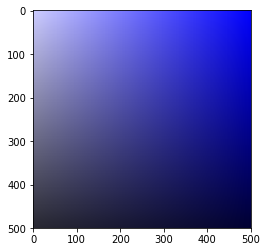

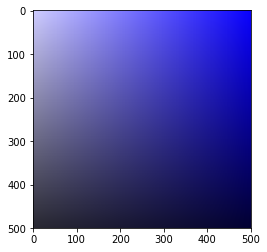

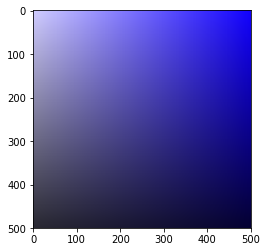

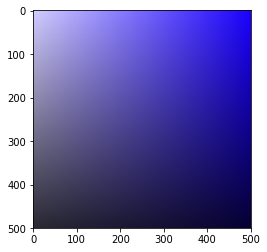

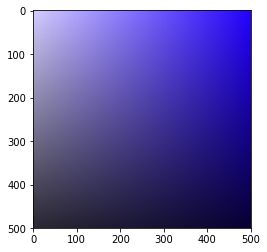

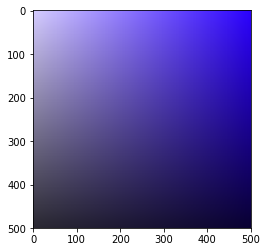

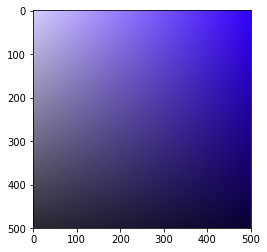

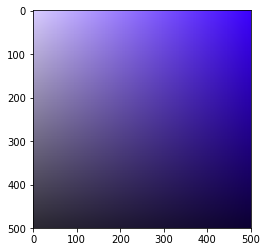

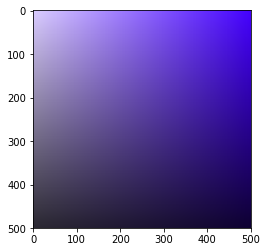

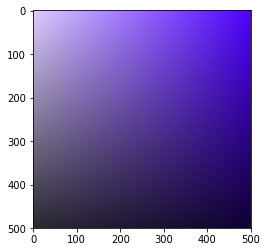

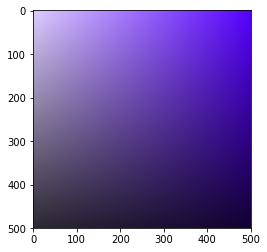

----------------------Range------------------- 1


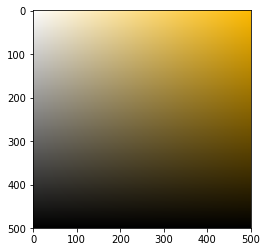

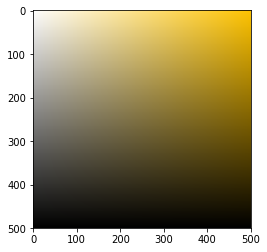

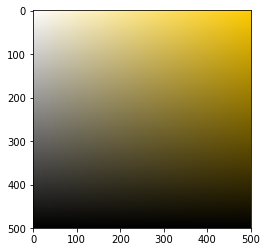

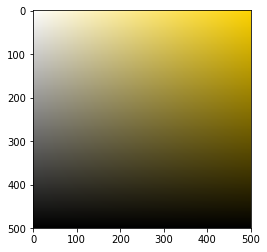

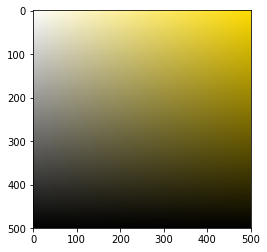

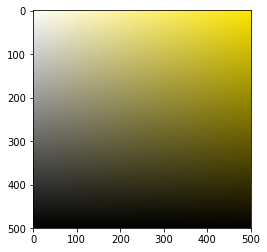

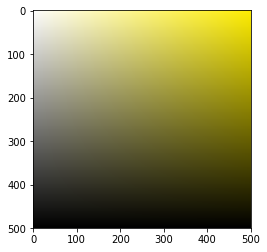

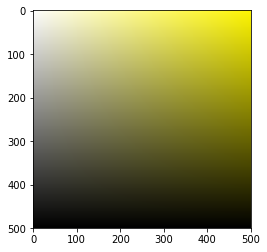

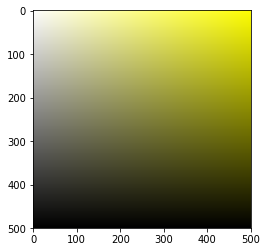

----------------------Range------------------- 2


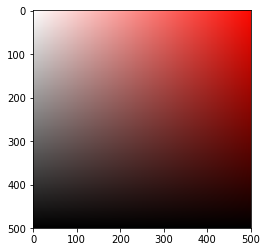

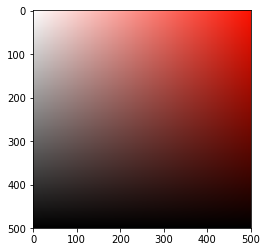

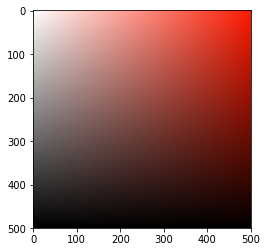

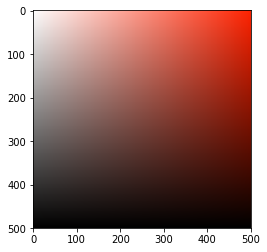

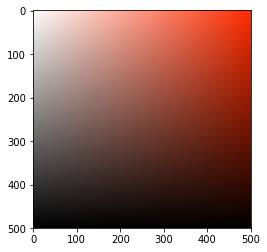

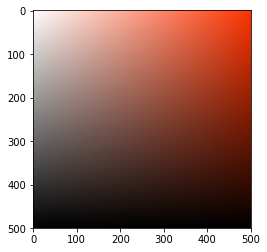

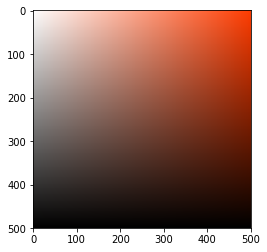

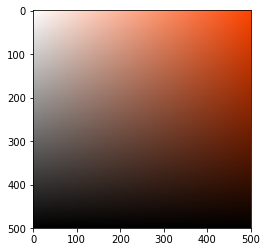

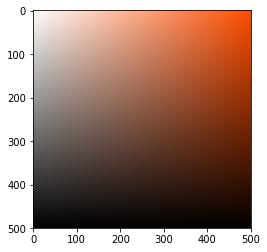

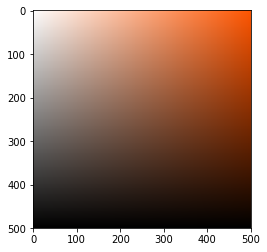

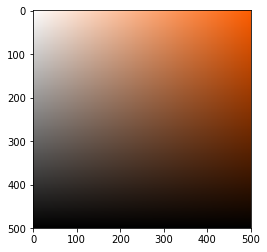

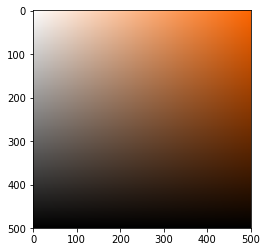

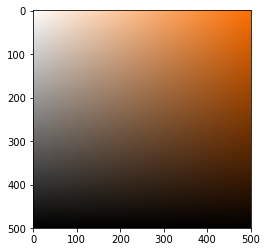

In [14]:
# Диапазоны для HSV
ranges = np.array([
    [[110, 50, 50], [130, 255, 255]],
    [[22, 0, 0], [30, 255, 255]],
    [[1, 0, 0], [13, 255, 255]]])


for i in np.arange(0, ranges.shape[0]):
    lower_b = ranges[i][0].astype(int)
    upper_b = ranges[i][1].astype(int)
    s_gradient = np.ones((500,1), dtype=np.uint8)*np.linspace(lower_b[1], upper_b[1], 500, dtype=np.uint8)
    v_gradient = np.rot90(np.ones((500,1), dtype=np.uint8)*np.linspace(lower_b[1], upper_b[1], 500, dtype=np.uint8))
    h_array = np.arange(lower_b[0], upper_b[0]+1)
    print("----------------------Range-------------------", i)
    for hue in h_array:
        h = hue*np.ones((500,500), dtype=np.uint8)
        hsv_color = cv2.merge((h, s_gradient, v_gradient))
        rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)
        plt.imshow(rgb_color) # диапазон в RGB пространстве
        plt.show()    
        cv2.waitKey(250)
        

RESULT image (HSV)


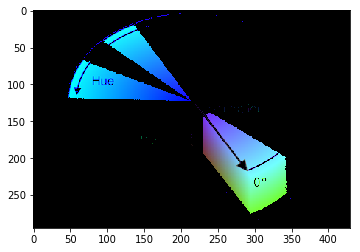

RESULT image (RGB)


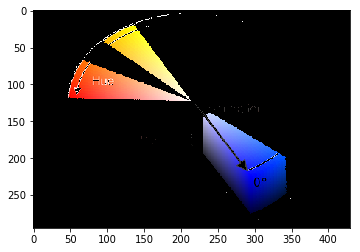

-1

In [15]:
# Применение маски
mask = np.zeros(shape=(source_img_rgb.shape[0], source_img_rgb.shape[1]), dtype=bool)
for i in np.arange(0, ranges.shape[0]):
    thisMask = cv2.inRange(source_image_hsv, ranges[i][0], ranges[i][1])
    mask = mask | thisMask # наложение масок


res_image_hsv = cv2.bitwise_and(source_image_hsv, source_image_hsv, mask=mask)
res_image_rgb = cv2.cvtColor(res_image_hsv, cv2.COLOR_HSV2RGB)

print("RESULT image (HSV)")
plt.imshow(res_image_hsv) # "RESULT image (HSV)"
plt.show()
print("RESULT image (RGB)")
plt.imshow(res_image_rgb) # "RESULT image (RGB)"
plt.show()
mpimg.imsave("result_dz_0.png", res_image_rgb)
